<a href="https://colab.research.google.com/github/Vixuz144/Simu2/blob/main/Spam_or_ham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este notebook encontraremos el ejemplo de modelar una distribución de 0's y 1's mutuamente excluyentes para introducirnos a l aestadística Bayesiana. Este modelo Beta-Binomial estará caracterizado por dos variables aleatorias:

$$ θ ∼ \textrm{Beta}(α, β) $$
$$ Y ∼ \textrm{Bin}(n = 1, p = θ) $$

donde:

$\hspace{7mm}θ$ es nuestra distribución a priori

$\hspace{7mm}Y$ es nuestra distribución likelihood o distribución de verosimulitud o distribución de probabilidad subjetiva.

Para ello, supongamos que no conocemos la distribución a posteriori de las dos anteriores, por lo cual usaremos el método de Metropolis-Hastings para obtener dicha distribución.

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

In [2]:
def posteriori(θ, Y, α, β):
  if 0 <= θ < 1:
    priori = stats.beta(α, β).pdf(θ)
    verosim = stats.bernoulli(θ).pmf(Y).prod()
    prob = priori * verosim
  else:
    prob = -np.inf

  return prob


In [3]:
Y = stats.bernoulli(0.7).rvs(20)

In [4]:
n = 10**3
desv = 0.05

α = β = 1
θ = 0.5
l = []

a = posteriori(θ, Y, α, β)

for i in range(n):
  θ_can = stats.norm(θ, desv).rvs()
  b = posteriori(θ_can, Y, α, β)
  pa = b/a

  if pa > stats.uniform(0,1).rvs():
    θ = θ_can
    a = b

  l.append(θ)

In [5]:
l = np.array(l)
print(l)

[0.51299046 0.57330836 0.62448737 0.60662865 0.60662865 0.56817355
 0.51926685 0.49847437 0.46296358 0.46296358 0.50092036 0.49350126
 0.5116348  0.55194362 0.60480095 0.5506451  0.61250995 0.65768049
 0.69991448 0.69805023 0.70981456 0.62389023 0.62389023 0.56655412
 0.57286376 0.57286376 0.64342091 0.66127787 0.71965918 0.61443368
 0.67198918 0.71311139 0.72783012 0.75755414 0.70595247 0.70595247
 0.71375599 0.71375599 0.68396266 0.72421923 0.72421923 0.72007784
 0.72007784 0.67783508 0.78776869 0.7717167  0.79219151 0.8710002
 0.78465544 0.76629656 0.72662166 0.7419598  0.75262168 0.77182577
 0.84806837 0.7799923  0.7799923  0.80761608 0.72616557 0.67677684
 0.70382835 0.62109234 0.61853943 0.61853943 0.62523685 0.62523685
 0.63533174 0.57906398 0.56741414 0.61503055 0.61826263 0.60874585
 0.61552262 0.58510775 0.60310404 0.60310404 0.60310404 0.67309326
 0.64324334 0.64324334 0.63122937 0.67790596 0.6797984  0.63902699
 0.67027465 0.67783441 0.69956526 0.7072246  0.71544079 0.66838

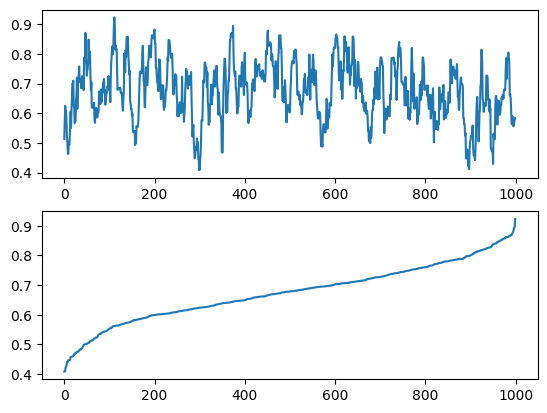

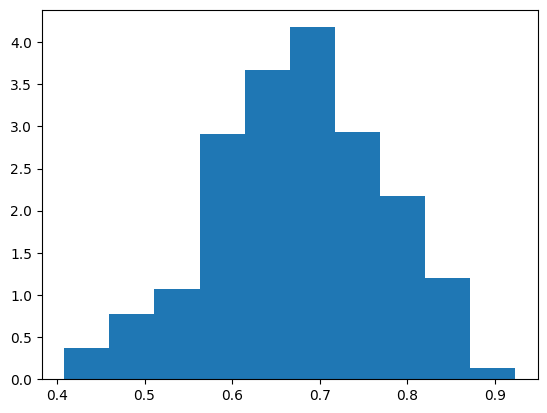

In [6]:
_, ax = plt.subplots(2,1, sharey=True)
ax[0].plot(l)
ax[1].plot(np.sort(l))
plt.show()

plt.hist(l, density=True)
plt.show()

In [7]:
az.summary(l, kind="stats", round_to=2)

,mean,sd,hdi_3%,hdi_97%
x,0.68,0.1,0.5,0.86


<Axes: title={'center': 'x'}>

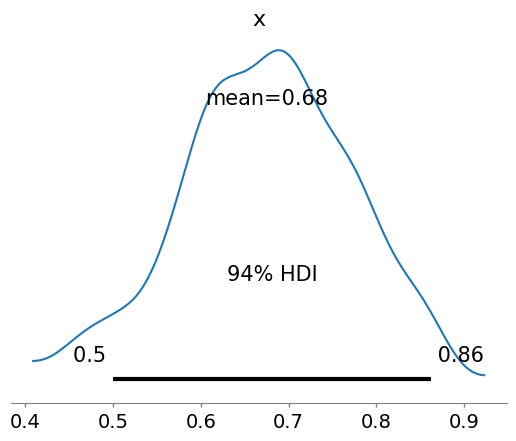

In [8]:
az.plot_posterior(l)

Implementación con la libreria PyMC

In [9]:
import pymc as pm

In [10]:
with pm.Model() as model:
  θ = pm.Beta(name='θ', alpha=1, beta=1)

  y_obs = pm.Binomial(name='y_obs', n=1, p=θ, observed=Y)

  idata = pm.sample(1000, return_inferencedata=True)

Output()

Output()

In [11]:
pos = idata.posterior.stack(sample=['chain', 'draw'])['θ']

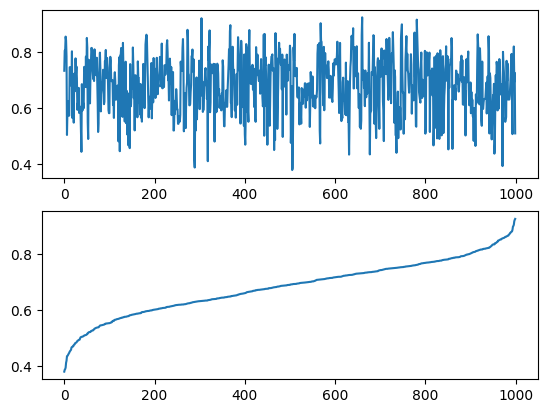

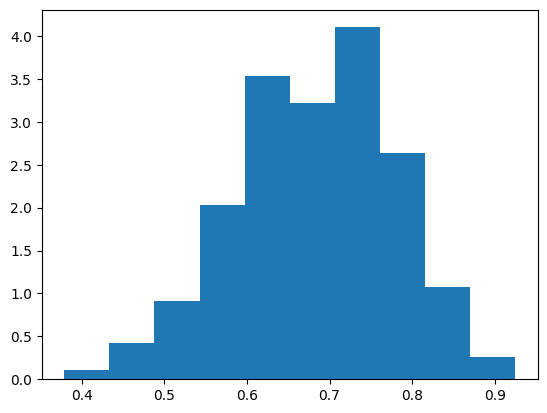

In [13]:
_, ax = plt.subplots(2,1, sharey=True)
ax[0].plot(pos[:1000])
ax[1].plot(np.sort(pos[:1000]))
plt.show()

plt.hist(pos[:1000], density=True)
plt.show()